In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_qr = pd.read_excel("MainstreamQR and QRRDP Time Series by UOA_v1.0.xlsx", sheet_name="Total", header=8).iloc[:-1]


In [3]:
data_qr

,Unit of assessment (REF2021),Unnamed: 1,2015-16,2016-17,2017-18,2018-19,2019-20,2020-21,2021-22,2022-23,2023-24,2024-25,2025-26
0,1.0,Clinical Medicine,122580619,124775660,126269897,124387554,127921591,127780383,126579002,146435496,147875384,148371115,149292934
1,2.0,"Public Health, Health Services and Primary Care",44318436,44987847,45833642,44566996,46116969,45766899,46181366,65940919,66958368,67087020,67934502
2,3.0,"Allied Health Professions, Dentistry, Nursing ...",77012890,78386792,78913541,78225149,79864331,79775224,79503318,103617054,104995510,105329902,107743005
3,4.0,"Psychology, Psychiatry and Neuroscience",63943709,65394097,78032146,76175588,87750096,87206323,89098898,108296825,109765722,110203651,120318238
4,5.0,Biological Sciences,80369651,82273799,83694977,83119498,85780948,87195826,87080244,91731905,90792968,91178588,89906088
5,6.0,"Agriculture, Food and Veterinary Sciences",20865206,21077497,21542837,21047677,21563665,21969221,22077746,25738714,25665695,25745151,25586862
6,7.0,Earth Systems and Environmental Sciences,37801456,38678199,39116957,38567457,39736632,39731023,39639227,47225595,46812583,46940387,46348991
7,8.0,Chemistry,49073417,49824979,50263821,49781216,50855433,50834055,50846379,57335213,57270811,57576228,56021345
8,9.0,Physics,59955952,60967171,62369927,61555091,63636707,64245607,63792911,74213441,73717960,74011058,72958325
9,10.0,Mathematical Sciences,63476827,64835954,65678592,64253466,66284626,66442920,66418521,75203311,75179878,75367166,73884539


In [4]:
sns.set_theme()
# Create an array with the colors you want to use
colors = ["#2E2D62", "#FF6900", "#00A788", "#1E5DF8", "#E355EC", "#3E863E", "#BE2BBB", "#008AAD", "#005E54", "#C13D33"]
# Set your custom color palette
sns.set_palette(sns.color_palette(colors))

sns.color_palette()

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

style_dict = {'axes.facecolor': 'white',
              'axes.edgecolor': '.8',
 'axes.grid': True,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': '.8',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': False,
 'axes.spines.bottom': True,
 'axes.spines.right': False,
 'axes.spines.top': False}

sns.set_style("whitegrid", style_dict)

In [5]:
data_qr.columns

Index(['Unit of assessment (REF2021)', 'Unnamed: 1', '2015-16', '2016-17',
       '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23',
       '2023-24', '2024-25', '2025-26'],
      dtype='object')

In [6]:
data_qr.rename(columns={"Unnamed: 1": "UoA"}, inplace=True)

In [7]:
data_qr = data_qr.sort_values(by="2025-26", ascending=False).head(10)


<Axes: xlabel='variable', ylabel='value'>

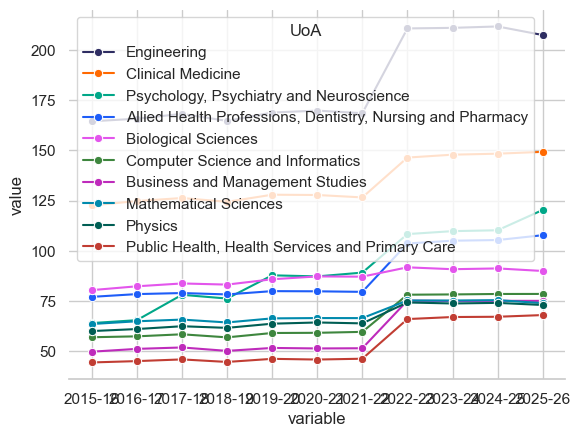

In [8]:
data_melt = data_qr.drop(columns="Unit of assessment (REF2021)").melt(id_vars="UoA")
data_melt['value'] = data_melt['value'] / 1000000

sns.lineplot(data=data_melt, x="variable", y="value", hue="UoA", marker="o")


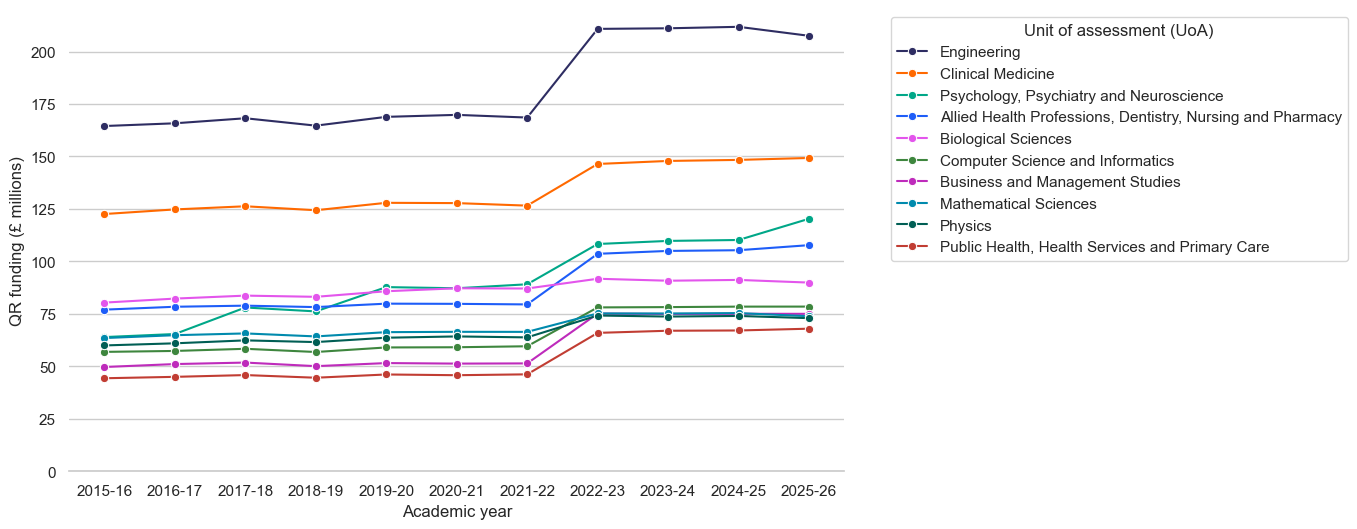

In [9]:
plt.figure(figsize=(10, 6))

sns.lineplot(data=data_melt, x="variable", y="value", hue="UoA", marker="o")
plt.ylabel("QR funding (£ millions)")
plt.xlabel("Academic year")

plt.ylim(bottom=0)

plt.legend(title="Unit of assessment (UoA)", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.gca().grid(axis='x')